<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/svm_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


(array([26., 28., 24., 16., 30., 22., 33., 20., 28., 23.]),
 array([0.01993051, 0.51461   , 1.0092895 , 1.50396899, 1.99864849,
        2.49332798, 2.98800748, 3.48268697, 3.97736647, 4.47204596,
        4.96672546]),
 <BarContainer object of 10 artists>)

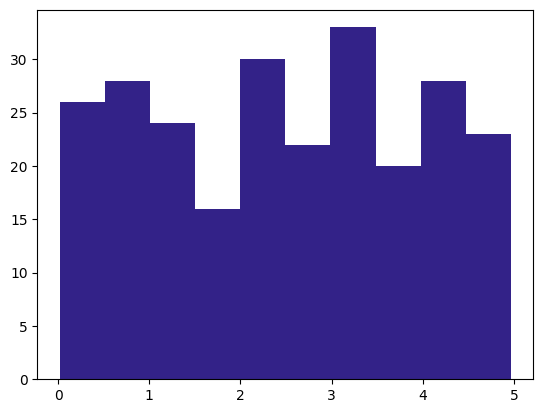

In [118]:
#tjid the way to have rondom data but with uniform
x=np.random.uniform(0,5,250)
plt.hist(x)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 7.000e+00, 8.000e+00, 1.200e+01, 1.500e+01,
        1.800e+01, 2.900e+01, 3.600e+01, 4.000e+01, 4.900e+01, 8.400e+01,
        9.600e+01, 1.330e+02, 1.560e+02, 2.140e+02, 2.500e+02, 3.050e+02,
        3.620e+02, 3.800e+02, 5.110e+02, 6.040e+02, 7.320e+02, 8.330e+02,
        9.580e+02, 1.115e+03, 1.284e+03, 1.454e+03, 1.658e+03, 1.811e+03,
        2.017e+03, 2.196e+03, 2.440e+03, 2.565e+03, 2.777e+03, 3.015e+03,
        3.206e+03, 3.206e+03, 3.448e+03, 3.414e+03, 3.533e+03, 3.557e+03,
        3.639e+03, 3.578e+03, 3.509e+03, 3.432e+03, 3.367e+03, 3.276e+03,
        3.058e+03, 2.919e+03, 2.796e+03, 2.442e+03, 2.303e+03, 2.210e+03,
        1.923e+03, 1.805e+03, 1.783e+03, 1.430e+03, 1.269e+03, 1.084e+03,
        9.500e+02, 8.180e+02, 6.960e+02, 5.860e+02, 5.000e+02, 4.180e+02,
        3.550e+02, 2.750e+02, 2.240e+0

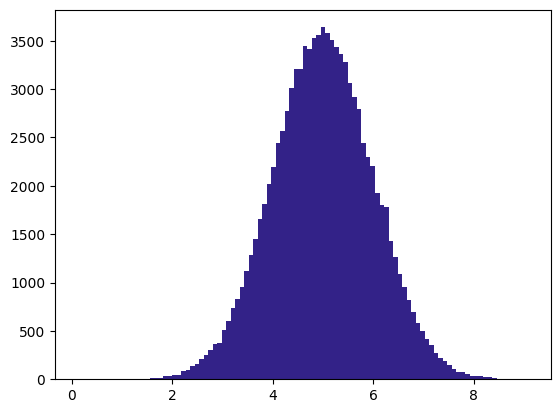

In [119]:
x=np.random.normal(5.0, 1.0, 100000)
plt.hist(x,100)

In [120]:
import random

random.seed(123)
print(random.randint(4, 100))

10


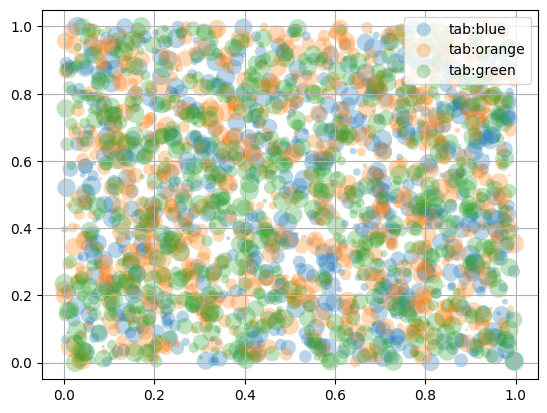

In [121]:
np.random.seed(19680801)


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [122]:
from sklearn.datasets import load_breast_cancer

In [123]:
df=load_breast_cancer(as_frame=True)
df=df.frame

In [124]:
y=df['target']
x=df.drop('target',axis=1)

In [125]:
print(y.sum())
print(x.sum())

357
mean radius                  8038.429000
mean texture                10975.810000
mean perimeter              52330.380000
mean area                  372631.900000
mean smoothness                54.829000
mean compactness               59.370020
mean concavity                 50.526811
mean concave points            27.834994
mean symmetry                 103.081100
mean fractal dimension         35.731840
radius error                  230.542900
texture error                 692.389600
perimeter error              1630.787700
area error                  22951.798000
smoothness error                4.006317
compactness error              14.497061
concavity error                18.147525
concave points error            6.712002
symmetry error                 11.688568
fractal dimension error         2.159300
worst radius                 9257.169000
worst texture               14610.340000
worst perimeter             61031.630000
worst area                 501051.800000
worst smooth

In [126]:
import matplotlib.colors
from cycler import cycler
binary_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#332288', 'white', '#AA4499'])
plt.rcParams["axes.prop_cycle"] = cycler(
    color=['#332288','#88CCEE','#44AA99','#117733','#999933','#DDCC77','#CC6677','#882255','#AA4499']
    )

In [127]:
df.target.value_counts()

,count
target,
1,357
0,212


InvalidIndexError: (slice(None, None, None), 0)

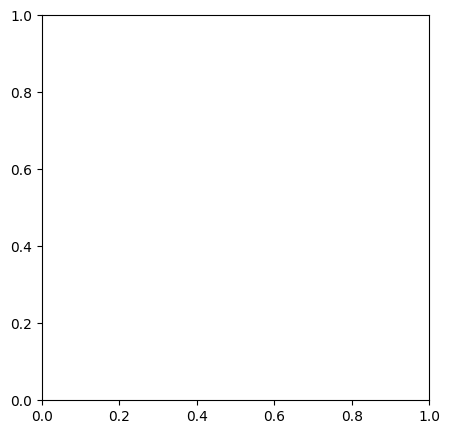

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=42)
x_tsne=tsne.fit_transform(x_scaler)

# setting the figure
fig, ax = plt.subplots(1,1,figsize=(5,5))

# plotting the data
scatter = ax.scatter(
    x=x[:,0],
    y=x[:,1],
    c=y.astype(bool),
    alpha=0.5,
    cmap=binary_cmap,
    )

# adding the legend
ax.legend(
    scatter.legend_elements(num=1)[0],
    ['Negative', 'Positive'],
    loc="upper right",
    title="Diagnosis",
    )

In [129]:
#svm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [131]:
from sklearn.svm import SVC

In [139]:
svc=SVC(kernel='rbf',random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [140]:
from sklearn.metrics import classification_report
y_pred=svc.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [141]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {accuracy_score(y_test, svc.predict(x_test))*100}%")

The accuracy is 97.6608187134503%


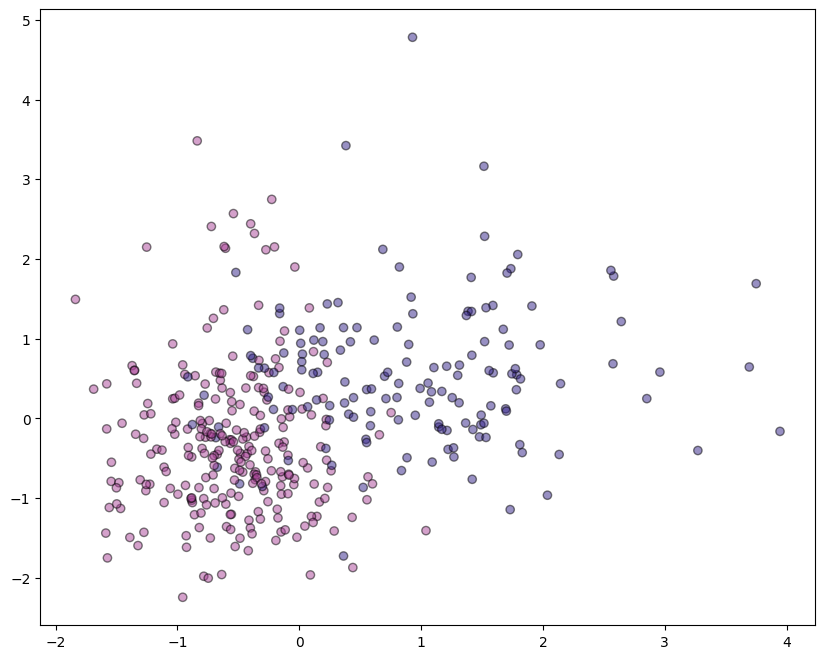

In [142]:
plt.figure(figsize=(10,8))
plt.scatter(x=x_train[:,0],y=x_train[:,1],c=y_train, alpha=0.5, cmap=binary_cmap, edgecolor='black')